In [14]:
#Importing Libraries
import numpy as np
import torch
import imageio
import matplotlib.pyplot as plt

In [15]:
#Import image
img_arr = imageio.imread('../HW1/images/color4.png')

In [16]:
#Image shape Height x Width x RGB
img_arr.shape 

(828, 1000, 4)

In [17]:
#Image to torch tensor then changing dimensions to RGBxHeightxWidth
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out.shape, out

(torch.Size([4, 828, 1000]),
 tensor([[[119, 119, 118,  ..., 204, 204, 204],
          [119, 119, 118,  ..., 202, 202, 203],
          [118, 118, 118,  ..., 202, 202, 202],
          ...,
          [ 17,  17,  17,  ...,  17,  17,  17],
          [ 17,  17,  17,  ...,  17,  17,  17],
          [ 17,  17,  17,  ...,  17,  17,  17]],
 
         [[ 28,  28,  27,  ...,   2,   2,   2],
          [ 28,  28,  27,  ...,   0,   0,   1],
          [ 27,  27,  27,  ...,   0,   0,   0],
          ...,
          [ 18,  18,  18,  ...,  18,  18,  18],
          [ 18,  18,  18,  ...,  18,  18,  18],
          [ 18,  18,  18,  ...,  18,  18,  18]],
 
         [[219, 219, 218,  ...,   2,   2,   2],
          [219, 219, 218,  ...,   0,   0,   1],
          [218, 218, 218,  ...,   0,   0,   0],
          ...,
          [ 36,  36,  36,  ...,  36,  36,  36],
          [ 36,  36,  36,  ...,  36,  36,  36],
          [ 36,  36,  36,  ...,  36,  36,  36]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
     

In [18]:
#Converting out to double (required for torch.mean)
double=out.to(torch.double)
double.shape

torch.Size([4, 828, 1000])

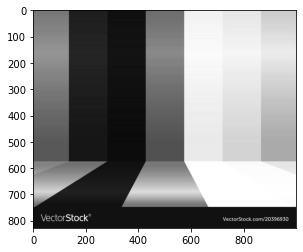

In [19]:
#Plotting Red channel for visual inspection
#White values indicate high levels of the color red
red_channel=double[0,:,:]
plt.imshow(red_channel,cmap='gray', vmin=0, vmax=255, clim=(240, 255))

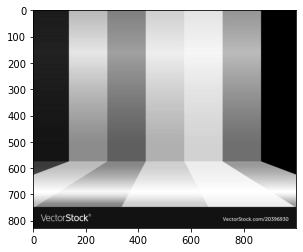

In [20]:
#Plotting Green channel for visual inspection
#White values indicate high levels of the color green
green_channel=double[1,:,:]
plt.imshow(green_channel,cmap='gray', vmin=0, vmax=255)


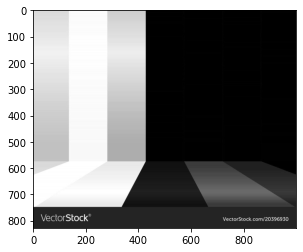

In [21]:
#Plotting Blue channel for visual inspection
#White values indicate high levels of the color blue
blue_channel=double[2,:,:]
plt.imshow(blue_channel,cmap='gray', vmin=0, vmax=255)

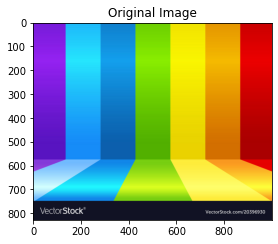

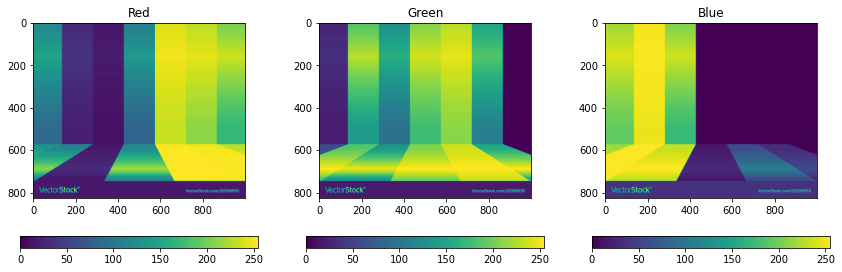

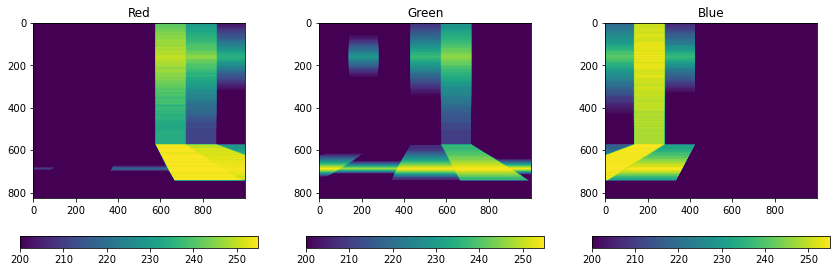

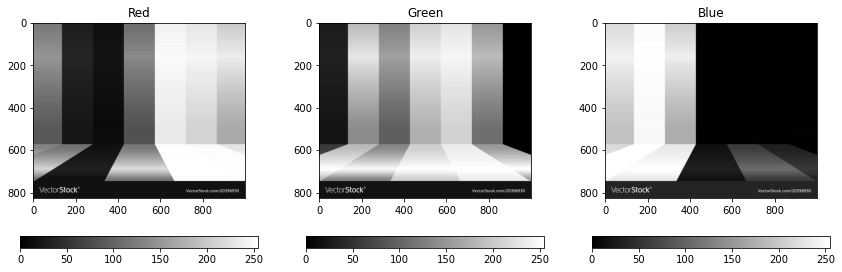

In [22]:
#Side by Side visualization

#Original Image
fig = plt.figure()
ax = fig.add_subplot(4, 3, 2)
red=plt.imshow(img_arr)
ax.set_title('Original Image')
plt.subplots_adjust(bottom=1, right=2, top=5)

#Sliced into RGB 

#Yellow indicates high color values and blue low values
fig = plt.figure()
ax = fig.add_subplot(4, 3, 4)
red=plt.imshow(red_channel)
ax.set_title('Red')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3,5 )
plt.imshow(green_channel)
ax.set_title('Green')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3, 6)
plt.imshow(blue_channel)
ax.set_title('Blue')
plt.colorbar( orientation='horizontal')
plt.subplots_adjust(bottom=1, right=2, top=5)

#Yellow indicates high color values and blue low values,
  #with cutoff set for low values(cuts out noise of other channels)
fig = plt.figure()
ax = fig.add_subplot(4, 3, 7)
red=plt.imshow(red_channel, clim=(200, 255))
ax.set_title('Red')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3,8 )
plt.imshow(green_channel, clim=(200, 255))
ax.set_title('Green')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3, 9)
plt.imshow(blue_channel, clim=(200, 255))
ax.set_title('Blue')
plt.colorbar( orientation='horizontal')
plt.subplots_adjust(bottom=1, right=2, top=5)

#Greyscale, white indicates high color values and black indicates low
fig = plt.figure()
ax = fig.add_subplot(4, 3, 10)
red=plt.imshow(red_channel,cmap='gray', vmin=0, vmax=255)
ax.set_title('Red')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3,11)
plt.imshow(green_channel,cmap='gray', vmin=0, vmax=255)
ax.set_title('Green')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3, 12)
plt.imshow(blue_channel,cmap='gray', vmin=0, vmax=255)
ax.set_title('Blue')
plt.colorbar( orientation='horizontal')
plt.subplots_adjust(bottom=1, right=2, top=5)

In [23]:
#Create array rgb to hold mean for each channel
rgb=np.array([0,0,0])
for x in range(3):
    rgb[x]=torch.mean(double[x,:,:])

In [24]:
#Total is the sum of the RGB channels percent is percent color out of total
total=np.sum(rgb[:])
percent=rgb/total
percent

array([0.35359116, 0.38121547, 0.26519337])

In [25]:
#Color is the max index value of rgb where red=0, green=1, blue=2
color=percent.argmax(axis=0)
color

1